In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# LeNet

In [2]:
import torch.nn as nn


class LeNet(nn.Module):
    def __init__(self, in_channels=3, classify_number=2):
        super().__init__()
        self.features = nn.Sequential(

            # in_channels * 32 * 32 -> 6 * 28 * 28
            nn.Conv2d(in_channels=in_channels, out_channels=6, kernel_size=(5, 5), stride=(1,), padding=2),
            nn.ReLU(),

            # 6 * 28 * 28 -> 6 * 14 * 14
            nn.MaxPool2d(kernel_size=2, stride=(2,)),

            # 6 * 14 * 14 -> 16 * 10 * 10
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5, 5), stride=(1,)),
            nn.ReLU(),

            # 16 * 10 * 10 -> 16 * 5 * 5
            nn.MaxPool2d(kernel_size=2, stride=(2,))
        )
        self.classifier = nn.Sequential(
            nn.Linear(in_features=16 * 5 * 5, out_features=120),
            nn.ReLU(),
            nn.Linear(in_features=120, out_features=84),
            nn.ReLU(),
            nn.Linear(in_features=84, out_features=classify_number)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

    def replace_fc(self, classify_number):
        self.classifier[-1] = nn.Linear(self.classifier[-3].out_features, classify_number)


# 查看 tensor shape

In [3]:
import torchvision.transforms as transforms
import PIL.Image as PILImage

pil_img = PILImage.open('/content/drive/MyDrive/lesson_dataset/monitor/frame_0001.jpg')

tensor_img = transforms.ToTensor()(pil_img)
print(tensor_img.shape)

tensor_img_with_batch_shape = tensor_img.unsqueeze(0)
print(tensor_img_with_batch_shape.shape)


torch.Size([3, 539, 539])
torch.Size([1, 3, 539, 539])


# 取得圖片經過模型輸出的 Feature map


In [4]:
import torch
le_net = LeNet().to(device = torch.device(f'cuda:0' if torch.cuda.is_available() else 'cpu'))

print(le_net)

## 取得圖片經過第一層 CNN 的 Feature map

(1, 539, 539, 6)


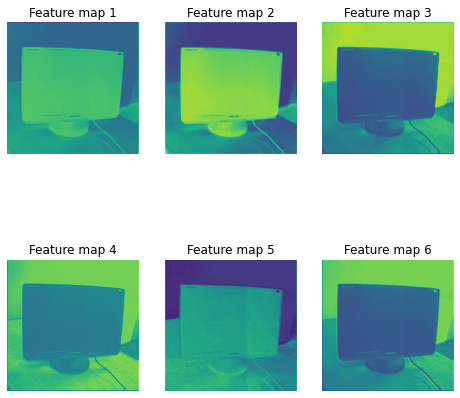

In [5]:
import matplotlib.pyplot as plt
import numpy as np

le_net_img = le_net.features[0](tensor_img_with_batch_shape).detach()

rgb_img = le_net_img.numpy().transpose(0, 2, 3, 1)

print(rgb_img.shape)

plt.figure(figsize=(8,8))

for index in range(6):

    plt.subplot(2, 3, index+1)

    plt.title(f'Feature map {index+1}')
    plt.axis('off')

    plt.imshow(rgb_img[0][:,:,index])
    



## 取得圖片經過 Flatten 前的 Feature map


(1, 132, 132, 16)


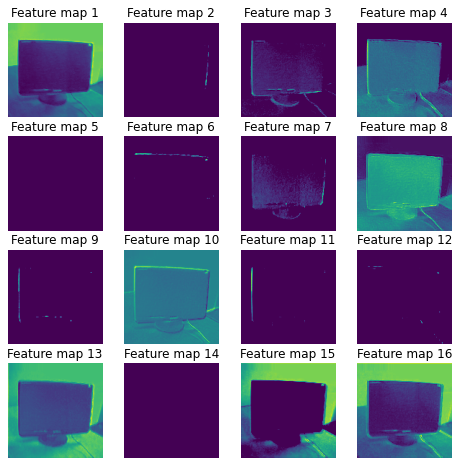

In [6]:


le_net_img = le_net.features(tensor_img_with_batch_shape).detach()

rgb_img = le_net_img.numpy().transpose(0, 2, 3, 1)

print(rgb_img.shape)

plt.figure(figsize=(8,8))

for index in range(16):

    plt.subplot(4, 4, index+1)

    plt.title(f'Feature map {index+1}')
    plt.axis('off')

    plt.imshow(rgb_img[0][:,:,index])

## 合併所有 Feature map 結果

(1, 132, 132, 16)


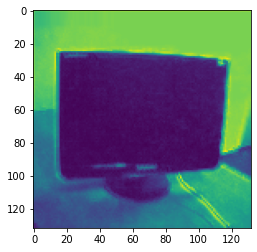

In [7]:
le_net_img = le_net.features(tensor_img_with_batch_shape).detach()

model_output_img = le_net_img.numpy().transpose(0, 2, 3, 1)
print(model_output_img.shape)

plt.imshow(np.sum(model_output_img[0], axis=2))